# **YOUTUBE SENTIMENT ANALYST**

-----------------------------------------------------------------------

## *------1. Taking and processng input data------*

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

` reading csv file to process `

In [2]:
Link=r'E:\My_Plan\Python\Update Myself\DA_youtube'
Namefile=r'\GBcomments.csv'
source=Link+Namefile
comments=pd.read_csv(source,error_bad_lines=False)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


` Import "textblog" lib to evaluate comment's quality `

In [4]:
from textblob import TextBlob

` Checking number of N/A value in dataframe `

In [5]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

` Droping N/A values out of dataframe `

In [6]:
comments.dropna(inplace=True)
comments.isna().sum()


video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

* ` Polarity figure describes loving level of comments which based on some noun-pharse or emoji or eventhough a positive/negative word . ` 
* ` If they positive, they'll greater than 0 and vice versa. It's positive when polarity figure is 1  ` 

In [7]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).polarity)


In [8]:
comments['Polarity']=polarity
comments.head()

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


-------------------------------------------------------------

## *-----2. Processing & visualizing positive/negative comments/sentiments------*

` Taking data having Polarity figure is 1 to prepare data for visualize positive sentiment & Polarity figure is -1 for negative sentiment  `

In [9]:
Pos_sen=comments[comments['Polarity']==1]
Neg_sen=comments[comments['Polarity']==-1]

* ` Import wordcloud to visualize data `
* ` The size of word is depend on how many time that word appear `

In [10]:
from wordcloud import WordCloud,STOPWORDS


` Processing input to apply wordcloud ` 

In [11]:
All_Pos_sen=' '.join(Pos_sen['comment_text'])
All_Neg_sen=' '.join(Neg_sen['comment_text'])

In [12]:
stopwords=set(STOPWORDS)
wordcloud_Pos=WordCloud(width=2000,height=1000,background_color='white',stopwords=stopwords,min_font_size=35).generate(All_Pos_sen)
wordcloud_Neg=WordCloud(width=2000,height=1000,background_color='black',stopwords=stopwords,min_font_size=35).generate(All_Neg_sen)

` Visualize `

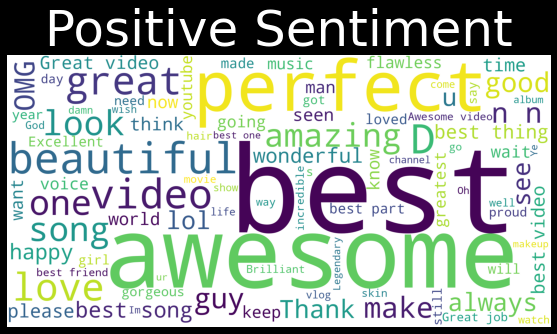

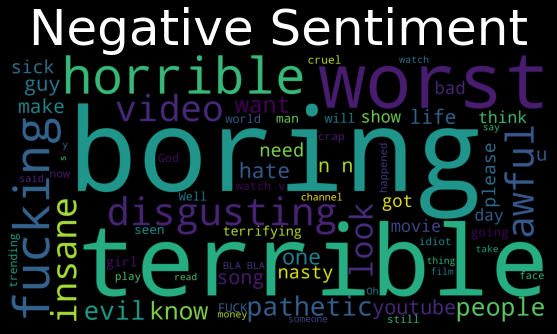

In [13]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_Pos)
plt.title('Positive Sentiment',fontsize=50)
plt.axis("off")
plt.show()
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_Neg)
plt.title('Negative Sentiment',fontsize=50)
# plt.title('Polarity=-1',fontsize=20)
plt.axis("off")
plt.show()

---------------------------------

## *-----3. Processing trending tag on youtube and visualizing trend following view & like or dislike by regression-----*

In [14]:
Link_vid=r'E:\My_Plan\Python\Update Myself\DA_youtube'
Name_vid=r'\GBvideos.csv'
Source_vid=Link_vid+Name_vid
video_df=pd.read_csv(Source_vid,error_bad_lines=False)
video_df.head()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


` Processing tag data and visualize this data `

In [15]:
vid_tag=''.join(video_df['tags'])
import re
tag_process=re.sub('[^a-zA-Z]',' ',vid_tag) #taking alphabet values if non-alphabet is replaced by space
tags=re.sub(' +',' ',tag_process) #replace more than 1 space to 1 space only

Text(0.5, 1.0, 'Tags')

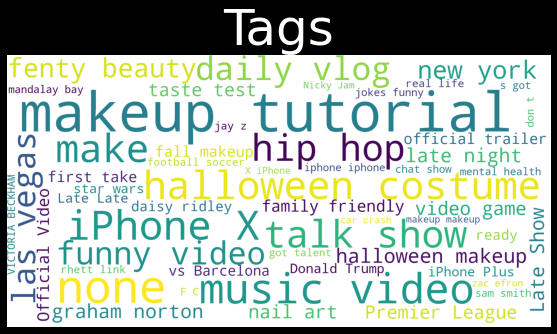

In [16]:
wordcloud_tags=WordCloud(width=2000,height=1000,background_color='white',stopwords=stopwords,min_font_size=35).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_tags)
plt.axis('off')
plt.title('Tags',fontsize=50)

` Giving correlation of views and likes/dislikes `

In [17]:
video_df_corr=video_df[['views','likes','dislikes']].corr(method='pearson')
video_df_corr

,views,likes,dislikes
views,1.000000,0.866249,0.671703
likes,0.866249,1.000000,0.623797
dislikes,0.671703,0.623797,1.000000


* ` r(view/like)=0.866 is quite good so linear regression is so suitable`
* ` r(view/dislike)=0.67 isn't quite good so linear regression is maybe not suitable `
* ` SOoooooooooooo, Choosing views and like to visualize `

` Set up for graph. just make up for it =)) `

In [144]:
import seaborn as sns
plt.style.use('dark_background')
# sns.set(style="ticks", context="talk")

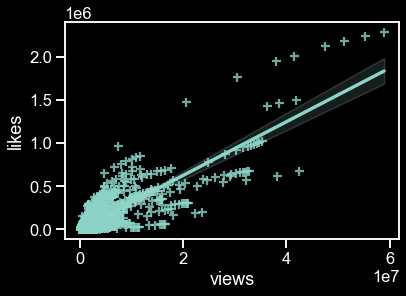

In [146]:
sns.regplot(data=video_df,x='views',y='likes',marker='+')
plt.show()

<AxesSubplot:>

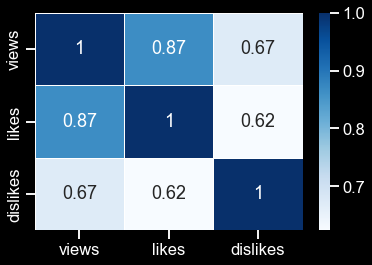

In [142]:
sns.heatmap(video_df_corr,annot=True,linewidths=.5,cmap='Blues')

----------------------------------

## *------4. Analysis the number of emoji in comments and Visualize top 20 popular emoji in comments to evaluate the trend of this------*

In [119]:
import emoji

In [120]:
# str_emo=''
# for i in comments['comment_text']:
#    for k in i:
#       if k in emoji.UNICODE_EMOJI['en']:
#          str_emo+=k



In [121]:
str_emo=''
for i in comments['comment_text']:
    emo01=tuple([c for c in i if c in emoji.UNICODE_EMOJI['en']])
    # result="".join(emo01) Không biết tại sao dùng này thì k ra =))) 
    for k in emo01:
        str_emo+=k

` Store emoji and number of this in dictionary with key: emoji and value: the number of that emoji `

In [133]:
dict_emo={}
for i in set(str_emo):
    dict_emo[i]=str_emo.count(i)
sorted_emo=sorted(dict_emo.items(),key=lambda x :x[1],reverse=True)
# From per tuple sort by the index 1 of this tuple
top20_emo=sorted_emo[0:20]
top20_emo


[('😂', 43947),
 ('❤', 36780),
 ('😍', 34856),
 ('🔥', 10249),
 ('😭', 9098),
 ('♥', 7173),
 ('💕', 6531),
 ('😘', 6334),
 ('👍', 5817),
 ('😬', 5489),
 ('👏', 5357),
 ('😊', 4946),
 ('💖', 4809),
 ('🏻', 4412),
 ('💜', 3616),
 ('👌', 3534),
 ('💗', 3071),
 ('💙', 2968),
 ('🏼', 2961),
 ('🙌', 2734)]

In [134]:
emo_list=[i[0] for i in top20_emo]
no_emo=[i[1] for i in top20_emo]

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128514 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128525 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128557 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTI

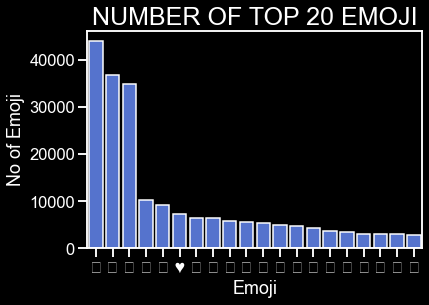

In [143]:
barplt=sns.barplot(x=emo_list,y=no_emo,color='royalblue')
plt.title('NUMBER OF TOP 20 EMOJI',size=25)
plt.xlabel('Emoji')
plt.ylabel('No of Emoji')
plt.show()